In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#import a pima file
pima = pd.read_csv("diabetes.csv")

In [3]:
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [14]:
#pima.tail()

In [15]:
#pima.corr()

In [16]:
#pima.describe()

In [17]:
#sns.boxplot(pima)

Text(0.5, 1, 'heatmap')

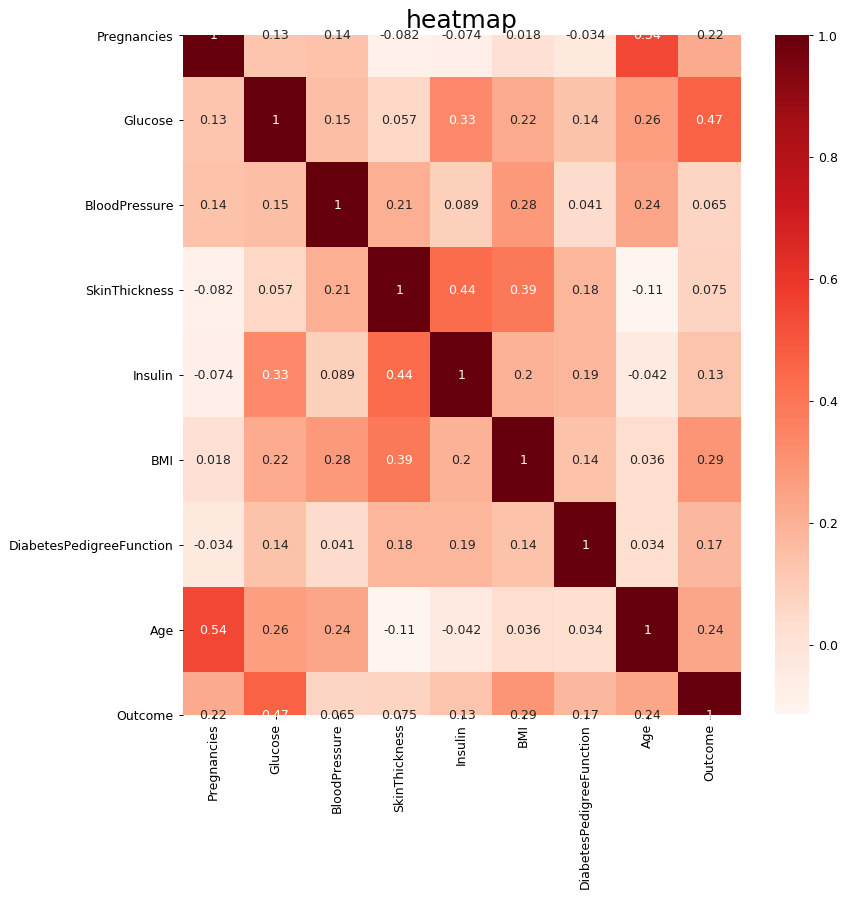

In [35]:
corr =pima.corr()
plt.figure(figsize=(10,10),dpi=90)
sns.heatmap(corr,annot=True,cmap='Reds')
plt.title("heatmap",fontsize=20)

In [38]:
print("diabetes dataset dimenstions {}".format(pima.shape))

diabetes dataset dimenstions (768, 9)


In [40]:
#split dataset in features and target variables
features_col =["Pregnancies",'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin' ,'BMI', 'DiabetesPedigreeFunction' ,'Age']
x=pima.iloc[:,0:8]
y=pima.iloc[:,-1]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.25,random_state=0)


In [43]:
x_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
762,9,89,62,0,0,22.5,0.142,33
127,1,118,58,36,94,33.3,0.261,23
564,0,91,80,0,0,32.4,0.601,27
375,12,140,82,43,325,39.2,0.528,58
663,9,145,80,46,130,37.9,0.637,40


In [45]:
x_test.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
661,1,199,76,43,0,42.9,1.394,22
122,2,107,74,30,100,33.6,0.404,23
113,4,76,62,0,0,34.0,0.391,25
14,5,166,72,19,175,25.8,0.587,51
529,0,111,65,0,0,24.6,0.660,31


In [46]:
y_train.head()

762    0
127    0
564    0
375    1
663    1
Name: Outcome, dtype: int64

In [47]:
y_test.head()

661    1
122    0
113    0
14     1
529    0
Name: Outcome, dtype: int64

In [48]:
#import model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [51]:
#fit the model 
logreg.fit(x_train,y_train)
y_predict = logreg.predict(x_test)
y_predict

C:\Users\venka\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

In [55]:
#import metric class
from sklearn import metrics
cnf_matrix=metrics.confusion_matrix(y_test,y_predict)
print(cnf_matrix)

[[119  11]
 [ 26  36]]


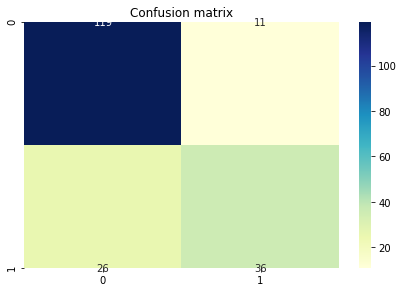

In [60]:
#plotting
class_names=[0,1]
fig, ax=plt.subplots()
tick_marks=np.arange(len(class_names))
ax.xaxis.set_label_position("top")
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
plt.tight_layout()
plt.title('Confusion matrix',y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
#create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu",fmt='g')

In [62]:
print("Accuracy:",metrics.accuracy_score(y_test,y_predict))
print("Precision:",metrics.precision_score(y_test,y_predict))
print("Recall:",metrics.recall_score(y_test,y_predict))

Accuracy: 0.8072916666666666
Precision: 0.7659574468085106
Recall: 0.5806451612903226


<function matplotlib.pyplot.show(*args, **kw)>

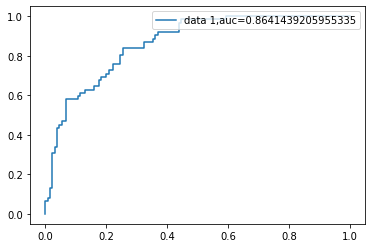

In [68]:
y_pred_proba=logreg.predict_proba(x_test)[::,1]
fpr,tpr,_=metrics.roc_curve(y_test, y_pred_proba)
auc=metrics.roc_auc_score(y_test,y_pred_proba)
plt.plot(fpr,tpr,label="data 1,auc="+str(auc))
plt.legend(loc=1)
plt.show